In [15]:
#Build a Multiple Linear Regression model to predict Performance_Rating based on Age, Years_at_Company, Job_Satisfaction,
#Work_Life_Balance, and Num_Trainings. Report R², MSE, and MAE.

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import RFE

In [3]:
df = pd.read_csv("synthetic_employee_data.csv")
features = ['Age', 'Years_at_Company', 'Job_Satisfaction', 'Work_Life_Balance', 'Num_Trainings']
X = df[features]
y = df['Performance_Rating']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [11]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [13]:
y_pred = lr.predict(X_test)

print("R2:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))

R2: 0.5973875257179737
MSE: 0.23076338510261218
MAE: 0.38456445372693776


In [17]:
#Compare Linear Regression, Ridge Regression, and Lasso Regression models for predicting Performance_Rating.
#Use 5-fold cross-validation and report average R² and RMSE. Which regularized model performs better?

In [21]:
models = {
    "Linear": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso()
}

for name, model in models.items():
    r2 = cross_val_score(model, X, y, cv=5, scoring='r2').mean()
    rmse = (-cross_val_score(model, X, y, cv=5, scoring='neg_root_mean_squared_error')).mean()
    print(f"{name} - R2: {r2:.3f}, RMSE: {rmse:.3f}")

Linear - R2: 0.608, RMSE: 0.479
Ridge - R2: 0.608, RMSE: 0.479
Lasso - R2: 0.238, RMSE: 0.668


In [29]:
#Train a Random Forest Regressor to predict Performance_Rating and visualize feature importances.
#Which features have the highest contribution to the rating?

In [25]:
rf = RandomForestRegressor()
rf.fit(X, y)

RandomForestRegressor()

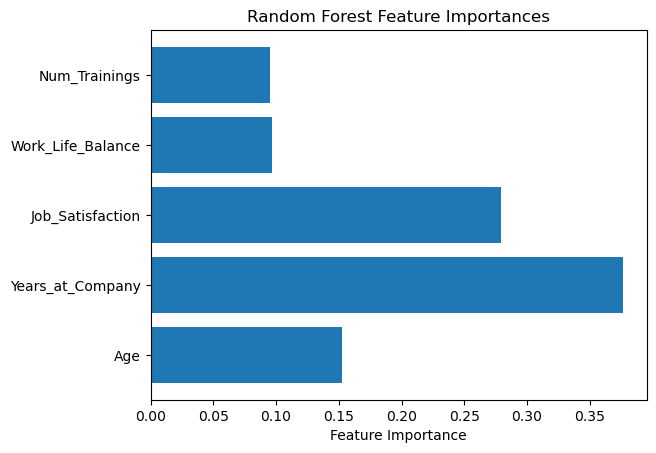

In [27]:
importances = rf.feature_importances_
plt.barh(features, importances)
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importances")
plt.show()

In [31]:
#Perform Polynomial Regression (degree 2 or 3) using Years_at_Company and Job_Satisfaction to predict Performance_Rating.
#Compare its performance with Linear Regression using adjusted R². Discuss overfitting if any.

In [35]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(df[['Years_at_Company', 'Job_Satisfaction']])

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, y)

In [39]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Polynomial Adjusted R²:", r2_score(y_test, y_pred))

Polynomial Adjusted R²: 0.5603319259958457


In [41]:
#Use Recursive Feature Elimination (RFE) with a Linear Regression model to select the top 4 features affecting Performance_Rating.
#Retrain the model with these and report change in performance metrics.

In [45]:
lr = LinearRegression()
rfe = RFE(lr, n_features_to_select=4)
rfe.fit(X, y)

RFE(estimator=LinearRegression(), n_features_to_select=4)

In [47]:
selected = X.columns[rfe.support_]
print("Top 4 Features:", selected.tolist())

Top 4 Features: ['Years_at_Company', 'Job_Satisfaction', 'Work_Life_Balance', 'Num_Trainings']
